<a href="https://colab.research.google.com/github/Dharmin-Shah/Machine-Learning-Projects/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Regression</h1>

### The Data (US Housing Dataa)

Problem: To help predicting housing prices for regions in the USA.

Solution: Use a machine learning model to predict the price.

Data File: USA_Housing.csv

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [1]:
#Normal imports
import numpy as np
import pandas as pd

In [2]:
# Data Visualisation Libs
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#initial steps for visualization
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
# Machine Learning Libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Checking out the data

In [5]:
USAHousing = pd.read_csv('https://raw.githubusercontent.com/Dharmin-Shah/Machine-Learning-Projects/master/Data/USA_Housing.csv')

In [6]:
USAHousing.head() # quick view of the data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
USAHousing.info() #quick view of total rows, columns and other info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
USAHousing.describe() #quick view of statistical info of the data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## EDA

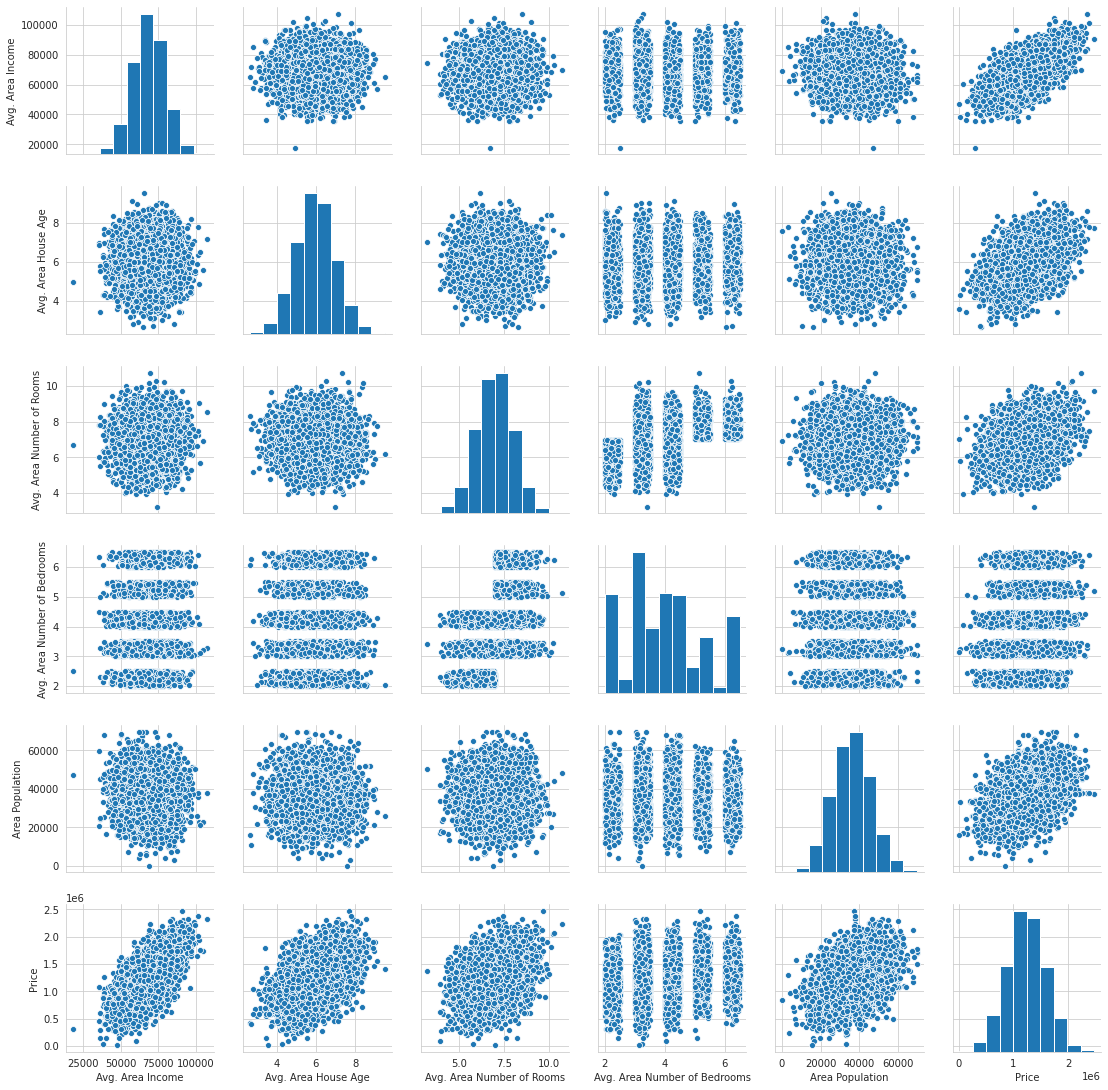

In [9]:
sns.pairplot(USAHousing) # A plot showing the relationship for each pair of the columns

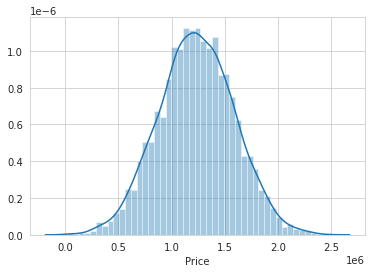

In [10]:
sns.distplot(USAHousing['Price']) # Distribution of Price

We can infer from the above graph the most of the houses are priced between 1 to 1.5 million

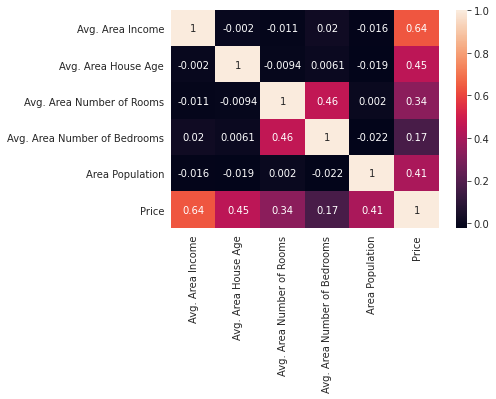

In [11]:
sns.heatmap(USAHousing.corr(),annot=True) # Plotting the correlation between columns

We get more idea from the above heatmap that columns Avg. Area Income and Price are highly correlated

## Training the Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [12]:
# Ignoring the Address column as it is non-numerical

X = USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
# Target column
y = USAHousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [13]:
# Splitting the data into train and test sets.
# Test set is 30% of the original data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Creating and Training the Model

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train) #Training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Predictions from our Model

Let's grab predictions off our test set and see how well it performed

In [17]:
predict = lm.predict(X_test)

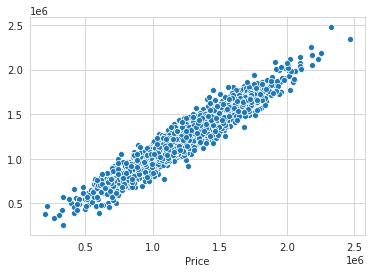

In [18]:
sns.scatterplot(y_test,predict)

As we can observe, the predictions are very close to the real values

## Regression Evaluation Metrics

Lets have look at the loss functions

In [19]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predict))
print('Mean Squared Error:', mean_squared_error(y_test, predict))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, predict)))

Mean Absolute Error: 81135.56609336883
Mean Squared Error: 10068422551.400854
Root Mean Square Error: 100341.52954485423
